<a href="https://colab.research.google.com/github/pablojgm/AICamp/blob/main/Facebook_Live_Selling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Milestone Project - Facebook dataset

Step 1:
You need to implement two important tasks in this step:
  1) Read the data files in each dataset and prepare them as dataframes.
  2) Implement three supervised machine learning methods on each dataset including
      a) Regression
      b) Random forest 
      c) k-NN

Step 2​:
You need to practice two important tasks in this step:
  1) Implement the following dimensionality reduction methods on each one of these datasets
      a) PCA 
      b) t-SNE 
      c) UMAP
  2) Implement PCA and then implement three supervised machine learning methods on each dataset including
      a) Regression
      b) Random forest 
      c) k-NN

Step 3​:
You need to practice clustering in this step:
  1) Read the data files in each dataset and prepare them as data frames. 
  2) Implement different clustering on each dataset including

# STEP 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"
dataset = pd.read_csv(url,index_col=0)

dataset

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN


*num_reaction = num_likes + num_loves + num_wows + num_hahas + num_sads + num_angrys*
except for these outliers:


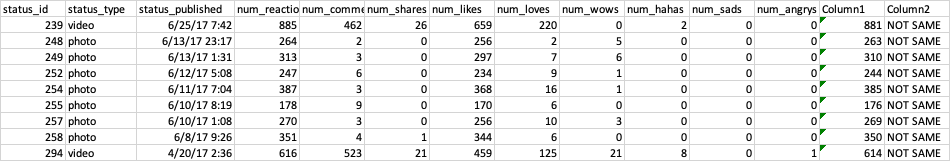


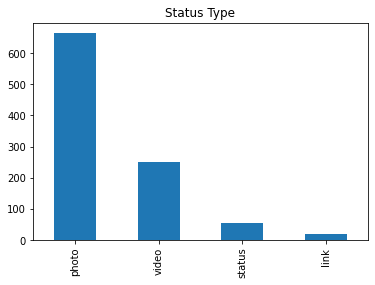

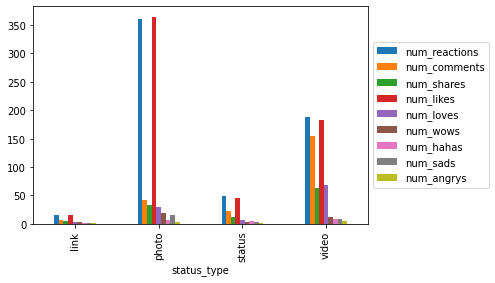

       num_reactions  num_comments  ...    num_sads  num_angrys
count     991.000000    991.000000  ...  991.000000  991.000000
mean      207.281534    104.718466  ...    0.463169    0.055499
std       214.257196    955.584551  ...    2.692377    0.348079
min         0.000000      0.000000  ...    0.000000    0.000000
25%        93.500000      3.000000  ...    0.000000    0.000000
50%       167.000000      8.000000  ...    0.000000    0.000000
75%       266.000000     16.500000  ...    0.000000    0.000000
max      4410.000000  20990.000000  ...   51.000000    6.000000

[8 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  991 non-null    int64
 1   num_comments   991 non-null    int64
 2   num_shares     991 non-null    int64
 3   num_likes      991 non-null    int64
 4   num_loves      991 non-null    int64
 5 

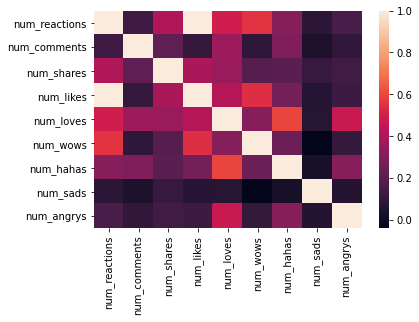

In [2]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#data cleaning
data = dataset.iloc[:1000,:-4]
data['reaction_check'] = data.iloc[:,-6:].sum(axis=1)
data['reaction_match'] = data.apply(lambda x: x['num_reactions'] == x['reaction_check'], axis=1)
data = data[data.reaction_match == True]
data.drop(['reaction_check', 'reaction_match'], axis=1, inplace=True)

data.drop(['status_published'], axis=1, inplace=True)

data.status_type.value_counts().plot(kind='bar',title="Status Type")

data.groupby('status_type').nunique().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#converting object to int
le = LabelEncoder()
data['status_type'] = le.fit_transform(data['status_type'])

target = data['status_type']
data.drop(['status_type'], axis=1, inplace=True)

print(data.describe())
data.info()

print(target.describe())

sns.heatmap(data.corr(method='pearson'))

#sns.pairplot(data)

In [3]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

#min_scal = MinMaxScaler()
#min_scal = Normalizer()

#X = min_scal.fit_transform(data)
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] 
#data = pd.DataFrame(X, columns=columns)
data = pd.DataFrame(preprocessing.scale(data), columns = columns)
data


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.502311,0.426427,4.888890,1.148865,4.674887,1.042554,0.828726,0.199490,-0.159526
1,-0.267484,-0.109641,-0.175933,-0.230922,-0.465110,-0.493379,-0.319900,-0.172116,-0.159526
2,0.092078,0.137453,0.925956,0.033292,0.708150,0.018599,0.828726,-0.172116,-0.159526
3,-0.449601,-0.109641,-0.175933,-0.421744,-0.465110,-0.493379,-0.319900,-0.172116,-0.159526
4,0.026703,-0.109641,-0.175933,0.033292,0.037716,-0.493379,-0.319900,-0.172116,-0.159526
...,...,...,...,...,...,...,...,...,...
986,-0.244136,-0.104406,-0.175933,-0.206458,-0.465110,-0.493379,-0.319900,-0.172116,-0.159526
987,-0.188100,-0.092889,-0.175933,-0.147744,-0.465110,-0.493379,-0.319900,-0.172116,-0.159526
988,-0.234797,-0.096030,-0.175933,-0.196672,-0.465110,-0.493379,-0.319900,-0.172116,-0.159526
989,-0.496297,-0.102312,-0.175933,-0.470672,-0.465110,-0.493379,-0.319900,-0.172116,-0.159526


In [ ]:
sns.heatmap(data.corr(method='pearson'))

### Regression

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=5)


In [5]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_pred = regr.predict(X_test)
#print(y_pred)

In [7]:
y_pred
y_test

status_id
980    1
290    1
817    1
231    1
61     1
      ..
876    0
569    1
879    1
666    1
542    1
Name: status_type, Length: 298, dtype: int64

In [8]:
from sklearn import metrics

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))


Coefficients: 
 [-0.16416872 -0.05061177  0.05240357 -0.21956504  0.53520468 -0.00985377
  0.09529788  0.02636159  0.0108818 ]
Mean squared error: 0.66
Mean absolute error: 0.63


### L1 Regularization: Lasso

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

X = data
y = target
#regr = ElasticNet(alpha=0.5,l1_ratio=0)
regr = Lasso(alpha=0.1)
regr.fit(X, y)
y_pred_reg = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred_reg))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred_reg))


Coefficients: 
 [-0.          0.          0.         -0.0807797   0.27354469 -0.
  0.06455153 -0.          0.        ]
Mean squared error: 0.58
Mean absolute error: 0.65


### L2 Regularization: Ridge

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

X = data
y = target
#regr = ElasticNet(alpha=0.5,l1_ratio=0)
regr = Ridge(alpha=1)
regr.fit(X, y)
y_pred_reg = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred_reg))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred_reg))


Coefficients: 
 [-0.11601558 -0.02611051  0.06220001 -0.15839931  0.41903204 -0.01151605
  0.13831274 -0.02360237 -0.01629543]
Mean squared error: 0.57
Mean absolute error: 0.61


### Random forest

In [11]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas
from sklearn import model_selection
X = data
Y = target
num_trees = 5
max_features = 4
kfold = model_selection.KFold(n_splits=10, random_state=5)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth=3)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8021212121212121


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### k-NN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier, weight("uniform")
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')

In [13]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test.values)

[3 1 1 1 1 1 1 1 1 1 2 3 1 1 3 1 3 1 1 2 1 1 3 1 1 1 1 3 1 1 3 1 3 1 1 3 1
 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1
 1 2 1 1 1 1 1 1 1 3 1 1 1 3 2 1 2 1 2 3 3 3 1 1 1 3 1 1 1 1 3 1 3 3 1 1 1
 1 1 1 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1 1 1
 3 1 1 1 3 1 1 3 1 3 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 0 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1
 3 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 3 1 1 1 0 1 3 1 1 1 3 1 3 1 1
 1 1]
[1 1 1 1 1 1 1 2 1 1 1 1 2 1 3 1 3 1 1 1 1 1 3 1 1 1 1 3 1 0 3 1 3 1 2 3 1
 1 2 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 3 1 1 1 1 1 3 1 3 1 2 1 1 3 1 1 1
 1 1 1 1 2 1 1 3 1 3 1 1 1 1 2 3 1 1 1 3 1 3 1 1 1 3 1 1 1 1 3 1 1 3 1 3 3
 1 3 1 1 2 1 1 3 3 3 3 1 1 1 1 1 2 1 1 3 1 1 3 1 1 1 3 1 3 3 3 3 1 1 1 1 1
 1 1 1 1 3 0 1 3 1 1 2 1 1 1 1 3 1 1 1 1 3 0 1 3 1 1 1 1 1 1 1 1 1 1 2 2 3
 1 3 1 1 3 1 3 1 1 

In [41]:
from sklearn import metrics

print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average=None))
print("recall", metrics.recall_score(y_test, y_pred, average=None))
print("F1-score", metrics.f1_score(y_test, y_pred, average=None))


Confusion matrix of the predictions:
 [[  0   5   0   1]
 [  0 186   0  22]
 [  0  13   0   4]
 [  0  26   0  41]]
accuracy of the predictions: 0.761744966442953
precision [0.         0.80869565 0.         0.60294118]
recall [0.         0.89423077 0.         0.6119403 ]
F1-score [0.         0.84931507 0.         0.60740741]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


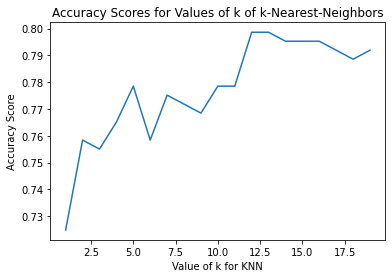

In [15]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# STEP 2

## PCA

(991, 9)


Text(0.5, 1.0, 'ICA')

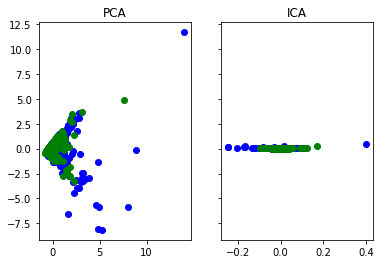

In [44]:
####
combined = pd.DataFrame(data)
print(combined.shape)
####
from sklearn import decomposition

combined_pca = decomposition.PCA(n_components=2,whiten=True).fit_transform(combined)
combined_ica = decomposition.FastICA(n_components=2, random_state=5).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_pca[0:500,0], combined_pca[0:500,1], c='blue')
ax1.scatter(combined_pca[500:1000,0], combined_pca[500:1000,1], c='green')
ax1.set_title('PCA')

ax2.scatter(combined_ica[0:500,0], combined_ica[0:500,1], c='blue')
ax2.scatter(combined_ica[500:1000,0], combined_ica[500:1000,1], c='green')
ax2.set_title('ICA')

In [17]:
component_num = 2
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(combined)

## Explained variance ratio by PCs
print(pca.explained_variance_ratio_)
## Singular values
print(pca.singular_values_)
## Get the coefficients of each original feature in building the PCs
print(pd.DataFrame(pca.components_,columns=combined.columns,index = ['PC1','PC2']))


#ica = decomposition.FastICA(n_components=component_num)
#ica.fit_transform(combined)
## Mixing matrix for ICA
# print(ica.mixing_)

[0.37950585 0.15892029]
[58.17914259 37.64850642]
     num_reactions  num_comments  num_shares  ...  num_hahas  num_sads  num_angrys
PC1       0.469420      0.197461    0.304079  ...   0.326982   0.05883    0.219901
PC2       0.350883     -0.393741    0.009585  ...  -0.388500  -0.07755   -0.438192

[2 rows x 9 columns]


In [18]:
def embedding_plot(X,labels,title):
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=5)
  plt.gca().set_facecolor((1, 1, 1))
  plt.xlabel('1st dimension')
  plt.ylabel('2nd dimension')
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
  plt.grid(False)
  plt.title(title, fontsize=24);

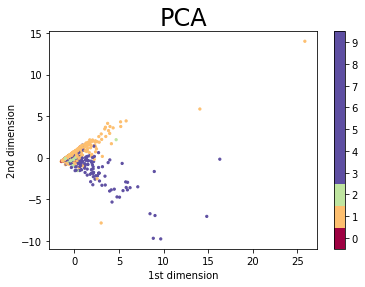

In [19]:
from sklearn import decomposition

X_pca = decomposition.PCA(n_components=2).fit_transform(data)
X_pca.shape

embedding_plot(X_pca, target,"PCA")

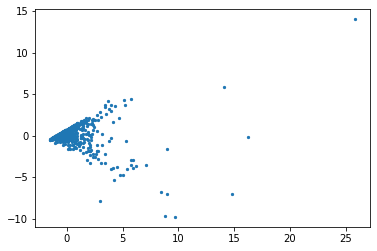

In [20]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=5)
plt.gca().set_facecolor((1, 1, 1))

[0.37950585 0.15892029 0.11583849 0.10395137 0.08304999]


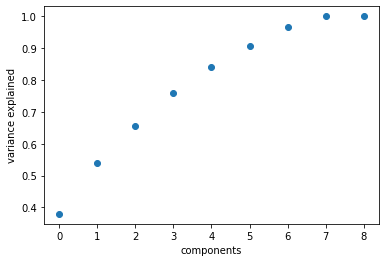

In [21]:
component_num = X.shape[1]
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(X)

plt.scatter(range(0,component_num),np.cumsum(pca.explained_variance_ratio_))
plt.gca().set_facecolor((1, 1, 1))
plt.xlabel('components')
plt.ylabel('variance explained')
print(pca.explained_variance_ratio_[0:5])

In [22]:
## Singular values
print(pca.singular_values_)
## Get the coefficients of each original feature in building the PCs
print(pd.DataFrame(pca.components_).iloc[0:2,0:9])

[5.81791426e+01 3.76485064e+01 3.21428605e+01 3.04490103e+01
 2.72162249e+01 2.40921553e+01 2.28617973e+01 1.76820530e+01
 1.33781687e-14]
          0         1         2  ...         6        7         8
0  0.469420  0.197461  0.304079  ...  0.326982  0.05883  0.219901
1  0.350883 -0.393741  0.009585  ... -0.388500 -0.07755 -0.438192

[2 rows x 9 columns]


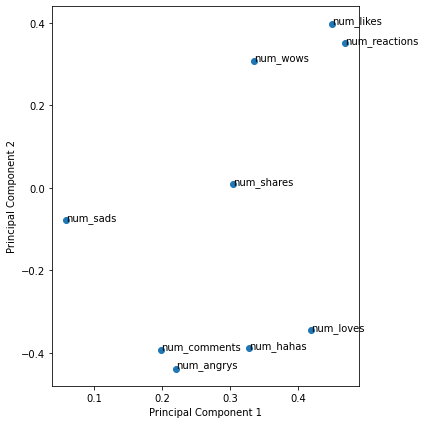

In [23]:
# we can visualize what the principal components seem to capture.
reaction = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] # reaction of users.

# we'll use first 2 principal components to visualise feature importance.
loadings = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':reaction})
loadings

fig = plt.figure(figsize = (6,6))
plt.scatter(loadings.PC1, loadings.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(loadings.Feature):
    plt.annotate(txt, (loadings.PC1[i],loadings.PC2[i]))
plt.tight_layout()
plt.show()

## t-SNE / UMAP

(991, 9)


Text(0.5, 1.0, 'UMAP')

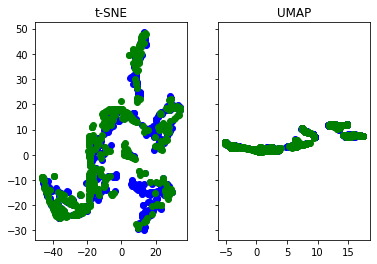

In [55]:
####
combined = data
print(combined.shape)
####
from sklearn import manifold
combined_tSNE = manifold.TSNE(n_components=2, init='pca',perplexity=25,learning_rate=200,n_iter=500,random_state=2).fit_transform(combined)
####
import umap
combined_UMAP = umap.UMAP(n_neighbors=25, min_dist=0.01, n_components=2,random_state=2).fit_transform(combined)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(combined_tSNE[0:500,0], combined_tSNE[0:500,1], c='blue')
ax1.scatter(combined_tSNE[500:1000,0], combined_tSNE[500:1000,1], c='green')
ax1.set_title('t-SNE')

ax2.scatter(combined_UMAP[0:500,0], combined_UMAP[0:500,1], c='blue')
ax2.scatter(combined_UMAP[500:1000,0], combined_UMAP[500:1000,1], c='green')
ax2.set_title('UMAP')

## PCA + 3 Supervised ML methods

In [25]:
data_pca = pd.DataFrame(combined_pca)
#data_pca

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.30, random_state=5)


In [26]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = regr.predict(X_test)
#print(y_pred)

In [28]:
y_pred
y_test

status_id
980    1
290    1
817    1
231    1
61     1
      ..
876    0
569    1
879    1
666    1
542    1
Name: status_type, Length: 298, dtype: int64

In [29]:
from sklearn import metrics

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))


Coefficients: 
 [ 0.16358881 -0.37647609]
Mean squared error: 0.63
Mean absolute error: 0.67


In [30]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas
from sklearn import model_selection
X = data_pca
Y = target
num_trees = 5
max_features = 2
kfold = model_selection.KFold(n_splits=10, random_state=5)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth=3)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7517676767676768


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [31]:
#k-NN
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier, weight("uniform")
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')

In [32]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test.values)

[3 1 1 1 1 1 1 1 1 1 1 3 1 1 3 3 3 1 1 1 1 1 3 1 1 1 1 3 3 1 3 1 3 1 1 3 1
 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 1 1 1 1 1 1 2 1 1 1 1 3 3 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 3 2 1 2 1 2 3 3 3 1 1 1 3 1 1 1 1 3 1 3 3 1 1 3
 1 1 1 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 1 3 1 1 3 1 3 1 3 1 1 3 3 3 1 1 1 3 1
 3 1 1 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 3 3 1 1 1 3 1 1 1 0 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 3 3 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 3 3 2 1 1
 3 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 3 1 0 1 3 0 1 3 1 1 1 3 3 1 1 1
 1 3]
[1 1 1 1 1 1 1 2 1 1 1 1 2 1 3 1 3 1 1 1 1 1 3 1 1 1 1 3 1 0 3 1 3 1 2 3 1
 1 2 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 3 1 1 1 1 1 3 1 3 1 2 1 1 3 1 1 1
 1 1 1 1 2 1 1 3 1 3 1 1 1 1 2 3 1 1 1 3 1 3 1 1 1 3 1 1 1 1 3 1 1 3 1 3 3
 1 3 1 1 2 1 1 3 3 3 3 1 1 1 1 1 2 1 1 3 1 1 3 1 1 1 3 1 3 3 3 3 1 1 1 1 1
 1 1 1 1 3 0 1 3 1 1 2 1 1 1 1 3 1 1 1 1 3 0 1 3 1 1 1 1 1 1 1 1 1 1 2 2 3
 1 3 1 1 3 1 3 1 1 

In [33]:
from sklearn import metrics

print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average=None))
print("recall", metrics.recall_score(y_test, y_pred, average=None))


Confusion matrix of the predictions:
 [[  1   4   0   1]
 [  2 180   3  23]
 [  0  12   1   4]
 [  0  23   2  42]]
accuracy of the predictions: 0.7516778523489933
precision [0.33333333 0.82191781 0.16666667 0.6       ]
recall [0.16666667 0.86538462 0.05882353 0.62686567]


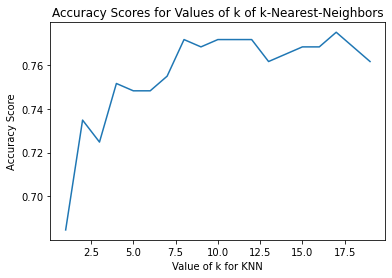

In [34]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# STEP 3

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Text(0.5, 1.0, 'DBSCAN')

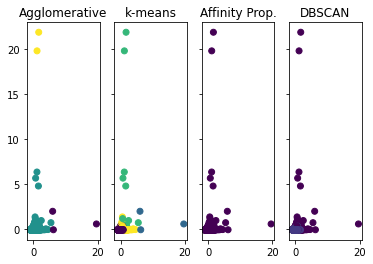

In [57]:
####
combined = data
####
from sklearn import cluster

combined_AC = cluster.AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete').fit(combined)
combined_KMeans = cluster.KMeans(n_clusters=4,max_iter=300).fit(combined)
combined_AP = cluster.AffinityPropagation( max_iter=200, convergence_iter=15).fit(combined)
combined_DB = cluster.DBSCAN(eps=0.5, min_samples=8).fit(combined)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)

ax1.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AC.labels_)
ax1.set_title('Agglomerative')

ax2.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_KMeans.labels_)
ax2.set_title('k-means')

ax3.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_AP.labels_)
ax3.set_title('Affinity Prop.')

ax4.scatter(combined.iloc[:,0], combined.iloc[:,1], c=combined_DB.labels_)
ax4.set_title('DBSCAN')

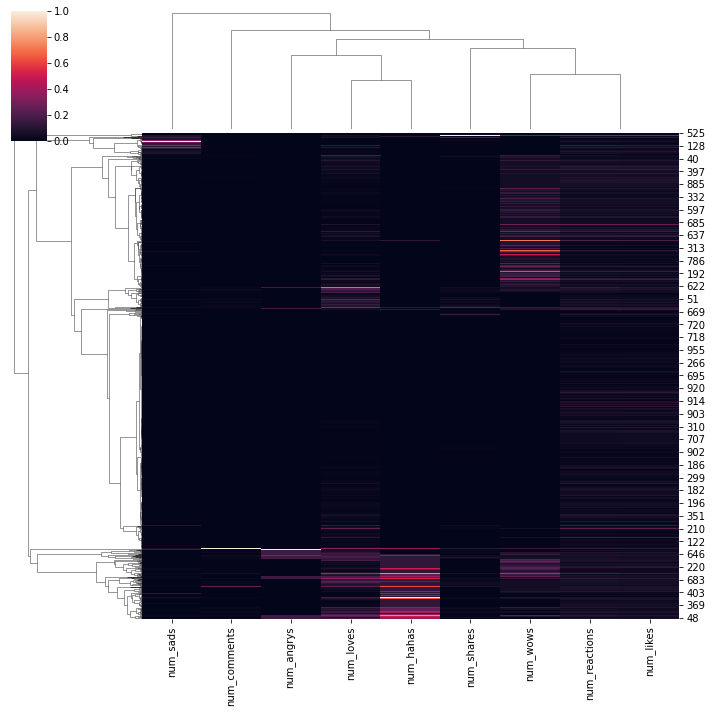

In [36]:
sns.clustermap(data,
               metric="correlation",
               standard_scale=1)